In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math
from matplotlib import pyplot as plt
#To calculate area below the normal distribution and calculate probabilities
from numpy import trapz 
from scipy.integrate import simps


# Hypothesis Testing Basics: One Sample Z Test (1-tailed/directional test):

(Source: [Study.com](https://study.com/academy/answer/a-principal-at-a-certain-school-claims-that-the-students-in-his-school-are-above-average-intelligence-a-random-sample-of-thirty-30-students-iq-scores-have-a-mean-score-of-112-is-there-sufficient-evidence-to-support-the-principal-s-claim.html))


We'll use the following typical example to get a grip on the notion of hyposthesis testing...

A principal at a certain school claims that the students in his school are above average intelligence. A random sample of thirty (30) students IQ scores have a mean score of 112. Is there sufficient evidence to support the principal's claim?

- The mean population IQ is 100 with a standard deviation of 15. Use a 0.05 significance level.
- Show all five steps of an appropriate hypothesis test, including finding step 6: the P-value analysis, and re-affirm the results with the help of P-value.
- Assume all conditions are satisfied for your chosen hypothesis test.




## Step One: List the parameters defined in the question

- Sample size: n = 30
- Population mean: μ = 100
- Population std deviation: σ = 15 
- Sample mean: x-bar = 112 
- We're using a level of significance α = 0.05 in this example (The other mostly used "α-value" is α=0.01) 

## Step Two: Write down the null hypothesis H_0:

In this example, H_0 is the fact that, the mean of students IQ is equal to the population mean (100). So, we'd have:
- H_0: μ = 100 

In this example, the alternate hypothesis is stating that the director is right: his students have an average IQ above the population mean. So we'd have:
- H_1: μ > 100


## Now what?

Based on: 
- The distribution of the population IQ value (that we can draw based on the parameters from step one)
- And the level of significance (also from step 1) 

We'll compare the z-score associated to the sample mean value (Z1) to the z-score associated to α (Z2):
- If Z1>Z2: we can reject H_0, and the principal will be right
- If Z1<Z2: then we'll reject H_1, and the principal will be wrong...

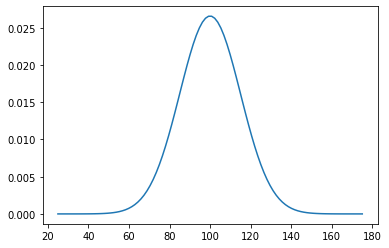

In [11]:
# step 1: We can't plot the distribution of the population IQ to visualize better what we're looking for...:
# We define parameters
mu = 100
variance = np.square(15)
sigma = math.sqrt(variance)

# We'll plot between [mu-5*sigma ; mu+5*sigma]
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

- To describe it in english: alpha, the level of significance, identifies a region of the distribution. In our example, alpha=0.05, means that we'll reject H_0 for the 5% top values of the standardized distribution (95% percentiles)
- In other words: The significance level determines how far out from the null hypothesis value we'll draw the line that decides if we reject or not or H_0

### To draw that line:

- Given the α = 0.05 value, we need to find the Z-score in the standard normal distribution that'll have all the distribution area but 5% of it 
- In other words, we want Z for "P(X<Z) = 0.95". We've seen how to do that in Session 2. The idea is to lookup in the z-score table.
- Finally, we'll compare the z-score associated to α = 0.05 (let's call it Z1) to the z-score associated to the sample mean (let's call it Z2)
#### if Z2>Z1: the statistics we're analyzing here (sample mean) lies in the critical region and we can reject H_0. If not... you get the idea...


- We can also use what's called the p-value. It represents the area beyond the z-scores previously calculated. In this case, given p1 the area associated to the Z1, and p2 the p-value associated to Z2, we can make the following comparison:
#### if p1>p2: the statistics we're analyzing here (sample mean) lies in the critical region and we can reject H_0. If not... you get the idea...

In [14]:
# step 1: Calculate the Z score of our statistics:
def ZscoreCalc(x_bar_val, muPopulation, sigmaPopulation, sampleSize):
    Zscore = (x_bar_val - muPopulation)/(sigmaPopulation/np.sqrt(sampleSize))
    return Zscore

sampleSize = 30
muPopulation = 100
sigmaPopulation = 15
x_bar_val = 112
ZscoreP2 = ZscoreCalc(x_bar_val, muPopulation, sigmaPopulation, sampleSize)
print("Here's Z2: " + str(ZscoreP2))
print("According to the Z-score table, Z1 value is approximately equal to 1.6 ")
print("Z2>Z1; We can reject H_0")


Here's Z2: 4.381780460041329
According to the Z-score table, Z1 value is approximately equal to 1.6 
Z2>Z1; We can reject H_0


# Hypothesis Testing Basics: One Sample Z Test (2-tailed/nondirectional test):

(Source: [YT](https://www.youtube.com/watch?v=aiRVUkM92os&feature=emb_logo))


Blood glucose levels for obese patients have a mean of 100 with a standard deviation of 15. A researcher thinks that a diet high in raw cornstarch will have an effect on blood glucose levels. A sample of 30 patients who have tried the raw cornstarch diet have a mean glucose level of 140. Test the hypothesis that the raw cornstarch had an effect or not.

let's go!

- The population mean glucose level is 100 with a standard deviation of 15. We're using a 0.05 significance level (default value if not stated otherwise...).


## The steps are the same as in the previous exercise...

### Step One: List the parameters defined in the question
Sample size: n = 36
Population mean: μ = 100
Population std deviation: σ = 15
Sample mean: x-bar = 140
We're using a level of significance α = 0.05 in this example

### Step Two: Write down the null hypothesis H_0:
In this example, H_0 is the fact that cornstarch has no effect on blood glucose levels:
H_0: μ = 100

In this example, the alternate hypothesis is stating that cornstarch will have a positive effect on blood glucose levels. So we'd have:
H_1: μ != 100

### Now what?
- The population parameters haven't changed, but this time, there's no indication on wether cornstarch increases or decreases blood glucose levels. That's the main difference with the previous exercise where we had the keyword "above average IQ" to give us a hint...
- So in this example, the critical region we'll use to decide wether or not we're rejecting H_0 will lie on both side of the standard normal distribution. Which will have as an effect, the reduction of that critical region by half ("α = α/2" on each sides):


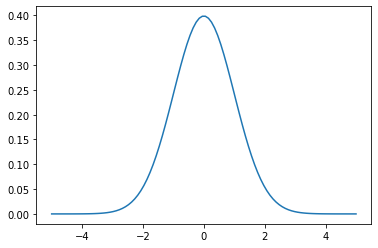

In [16]:
#Use the filling function to identify the 2 areas of the critical region
mu = 0
variance = np.square(1)
sigma = math.sqrt(variance)

# We'll plot between [mu-5*sigma ; mu+5*sigma]
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()



- As you've probably guessed, the z-score absolute value associated with these new critical region will be bigger, so thougher to beat. Looking up the value 1-0.025=0.975 in the z-scores table, we find a z-score Z1 = 1.95. That's what we need to beat!
- Now let's calculate Z2:

In [17]:
sampleSize = 30
muPopulation = 100
sigmaPopulation = 15
x_bar_val = 140

ZscoreP2 = ZscoreCalc(x_bar_val, muPopulation, sigmaPopulation, sampleSize)
print("Here's Z2: " + str(ZscoreP2))

Here's Z2: 14.60593486680443


### You get the idea, we can reject H_0 and state that cornstarch will have an effect on glucose blood levels. The difference of that sample mean with the population parameter is not just do to random data variation... 
(put this sentence at the end of the first example plz)